In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (9, 6)
plt.rcParams['axes.labelpad'] = 10
sns.set_style("darkgrid")

## Loading the data

In [215]:
raw_data = pd.read_csv("C:/Users/yashd/Downloads/TSLA.csv")
df = raw_data.copy()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


## Data Exploration

In [216]:
df.shape

(2416, 7)

In [217]:
#Checking for null values
df.isna().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [218]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


### Finding correlations between columns

In [219]:
correlations = df.drop(['Date'], axis=1).corr()
print(correlations)

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999425  0.999575  0.998886   0.998886  0.501762
High       0.999425  1.000000  0.999389  0.999640   0.999640  0.512944
Low        0.999575  0.999389  1.000000  0.999447   0.999447  0.493496
Close      0.998886  0.999640  0.999447  1.000000   1.000000  0.505169
Adj Close  0.998886  0.999640  0.999447  1.000000   1.000000  0.505169
Volume     0.501762  0.512944  0.493496  0.505169   0.505169  1.000000


### Dsitribution of Data

c:\users\yashd\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\yashd\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\yashd\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

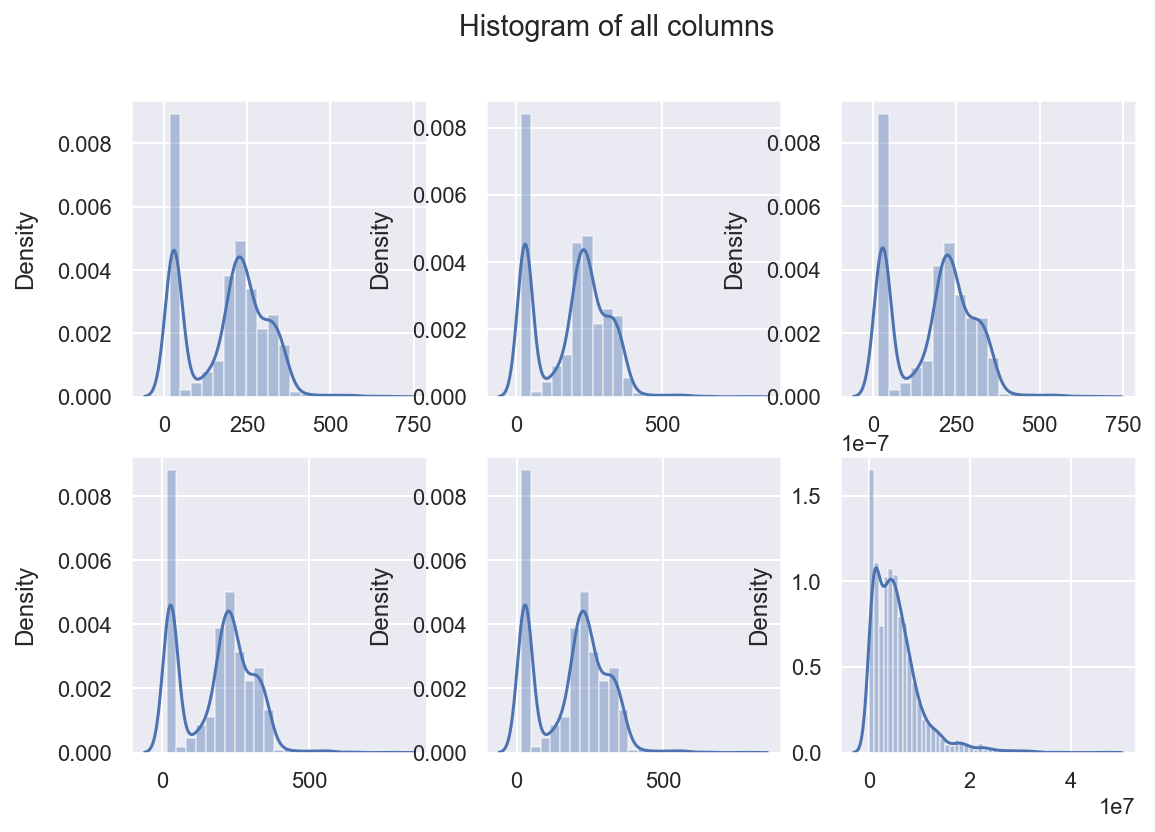

In [220]:
#Visualizing distribution for all the columns
def graphs(data):
    fig, axes = plt.subplots(2,3)
    fig.suptitle("Histogram of all columns")

    c,k =0, 0

    for i in data.columns.values:
        sns.distplot(ax = axes[k, c], x=df[i])
        if c == 2:
            k+=1
            c=0
            continue
        c+=1
graphs(df.drop(['Date'], axis=1))

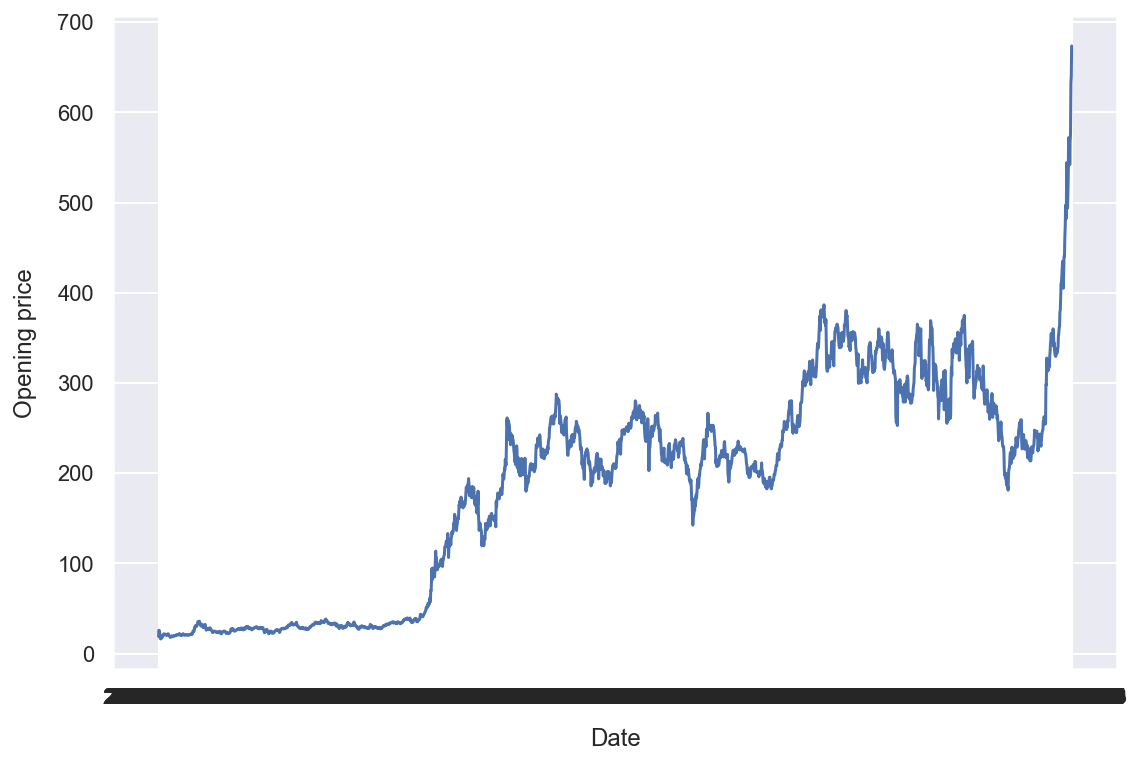

In [221]:
# Making time series graph of all Opening prices
plt.plot(df['Date'], df['Open'])
plt.xlabel("Date")
plt.ylabel("Opening price")
plt.show()

### Splitting training and testing data

In [222]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop(['Open'], axis=1),df.drop(['High','Low','Close','Adj Close','Volume'], axis=1) , test_size=0.2, shuffle=True, random_state=0)

## Simple Linear Regression

In [223]:
# Considering only Adjusted price for X
x_linear = np.array(x_train['Adj Close'])
x_reg = x_linear.reshape(-1,1)

In [224]:
y_train['Open']

1122    210.529999
727      91.120003
1601    189.000000
775     129.320007
713      56.000000
           ...    
1033    238.899994
1731    318.380005
763     124.879997
835     170.500000
1653    245.850006
Name: Open, Length: 1932, dtype: float64

In [225]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
fit = model.fit(x_reg,y_train['Open'])
m = fit.coef_.flatten()
b = fit.coef_.flatten()
print("R-score of simple linear regression: {}".format(model.score(x_reg,y_train['Open'])))

R-score of simple linear regression: 0.9977891703903771


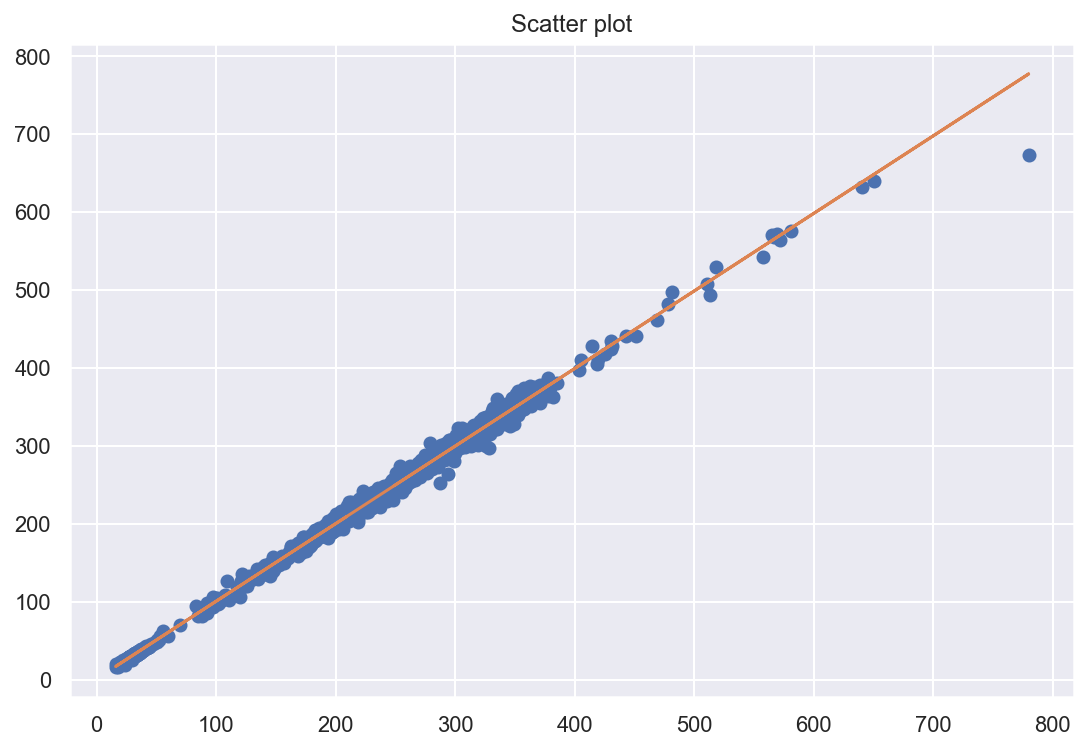

In [226]:
#Scatter plot to show fitness of model
plt.plot(x_reg,y_train['Open'],'o')
plt.title("Scatter plot")
plt.plot(x_reg, m*x_reg + b)
plt.show()

## Testing the data

In [227]:
x_array = np.array(x_test['Adj Close'])
y_array = np.array(y_test['Open'])

x_test_2d = x_array.reshape(-1,1)
y_test_2d = y_array.reshape(-1,1)

In [228]:
prediction = model.predict(x_test_2d)

In [229]:
prediction = prediction.reshape(-1,1)
prediction.shape

(484, 1)

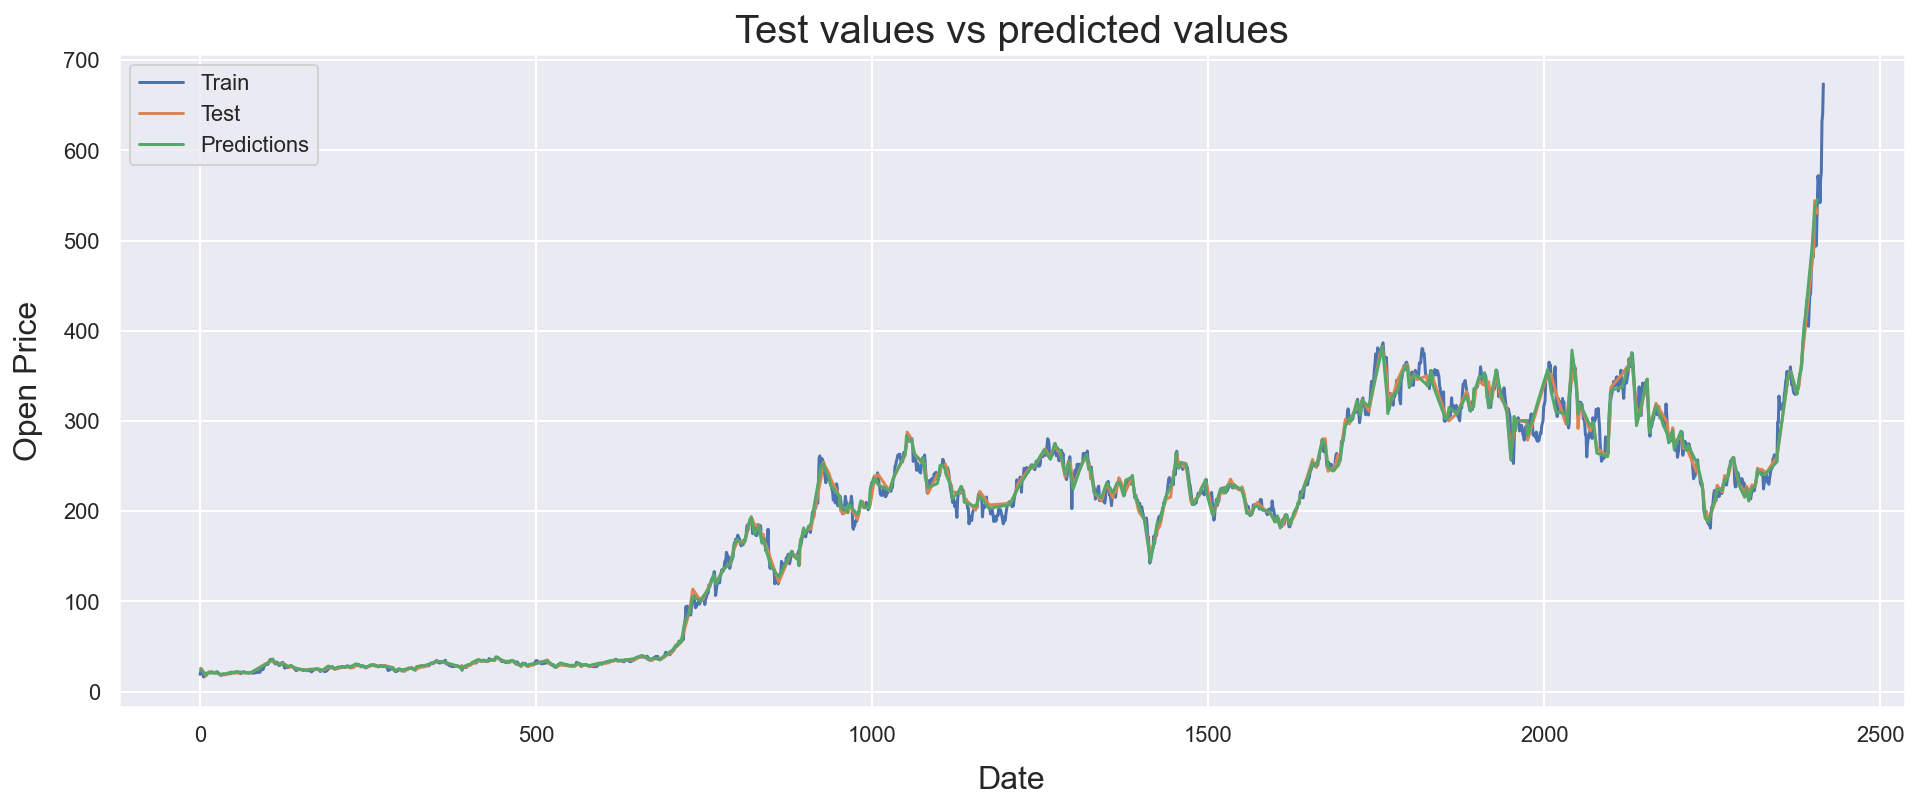

In [230]:
#Plotting the difference between test and prediction values
model_df = pd.DataFrame(columns = ['Date','Test', 'Predicted'])
model_df['Date'] = y_test['Date']
model_df['Test'] = y_test['Open']
model_df['Predicted'] = prediction.flatten()

model_df = model_df.sort_values(by = "Date")
y_train = y_train.sort_values(by = "Date")

plt.figure(figsize = (16,6))
plt.title("Test values vs predicted values", fontsize = 20)
plt.xlabel("Date", fontsize = 16)
plt.ylabel("Open Price", fontsize = 16)
plt.plot(y_train["Open"])
plt.plot(model_df['Test'])
plt.plot(model_df['Predicted'])
plt.legend(['Train','Test', 'Predictions'])
plt.show()

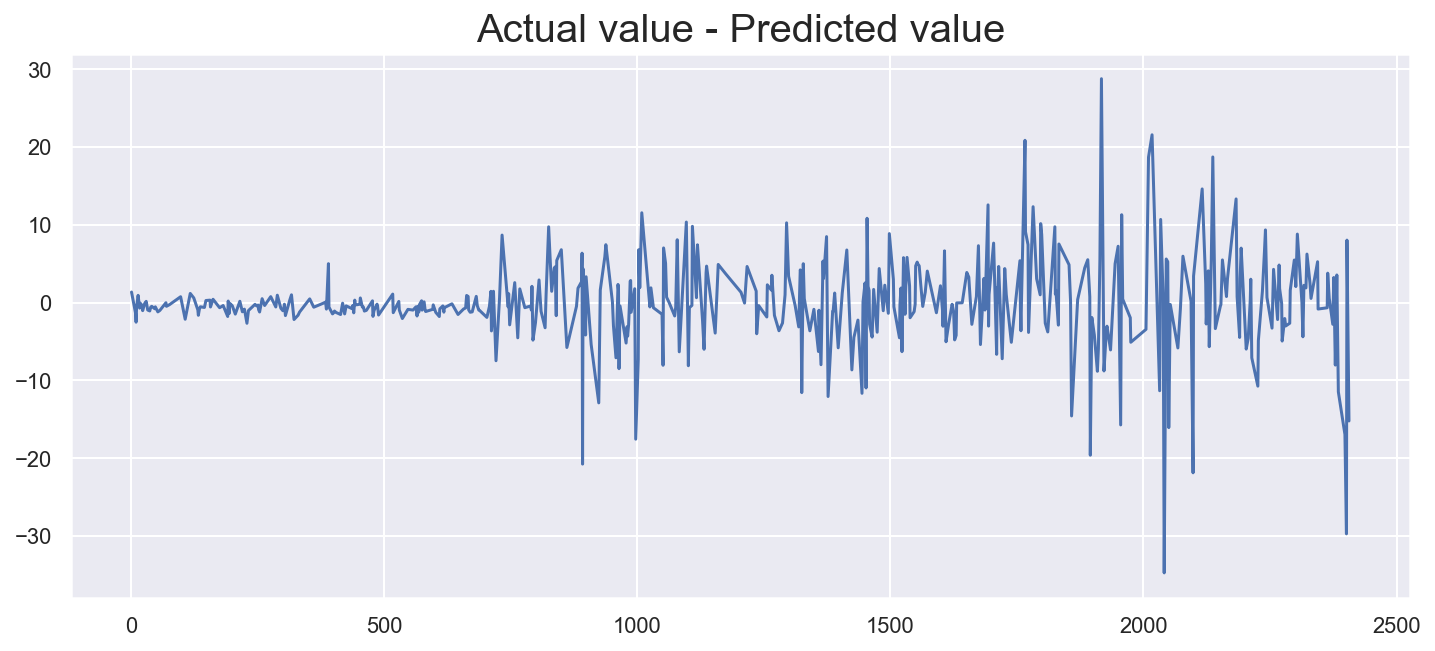

In [231]:
model_df["Difference"] = model_df['Test'] - model_df['Predicted']
plt.figure(figsize= (12,5))
plt.title("Actual value - Predicted value", fontsize = 20)
plt.plot(model_df["Difference"])
plt.show()